# Demo code for Plotly 

Using plotly is **not** required to get full credit on the project! You can have a great project using only the tools we've covered in class so far. This is just in case you are curious and want to learn something new.

Plotly express is an excellent package for interactive visualization. It has very similar syntax as seaborn, which is good news for us.

- https://plotly.com/python/plotly-express/
- https://plotly.com/python/plotly-fundamentals/


Let me show you a few examples.

This is based on these lecture notes, which I recommend reading: https://nbviewer.org/github/PhilChodrow/PIC16B/blob/master/lectures/geo/geoviz-1.ipynb

## Prepare data

In [1]:
import pandas as pd

In [2]:
# Table from Our World in Data that I downloaded for demonstration.
# From https://ourworldindata.org/grapher/access-to-clean-fuels-and-technologies-for-cooking?tab=table
df = pd.read_csv('access-to-clean-fuels-and-technologies-for-cooking.csv')
df.head()

,Entity,Code,Year,Proportion of population with primary reliance on clean fuels and technologies for cooking (%) - Residence area type: Total
0,Afghanistan,AFG,1990,1.6
1,Afghanistan,AFG,1991,1.8
2,Afghanistan,AFG,1992,2.1
3,Afghanistan,AFG,1993,2.4
4,Afghanistan,AFG,1994,2.9


In [3]:
# Make another copy of the column with a really long name and call it Total
df['Total'] = df['Proportion of population with primary reliance on clean fuels and technologies for cooking (%) - Residence area type: Total']

# Drop the column with the really long name
df = df.drop(columns = ['Proportion of population with primary reliance on clean fuels and technologies for cooking (%) - Residence area type: Total'])

df

,Entity,Code,Year,Total
0,Afghanistan,AFG,1990,1.6
1,Afghanistan,AFG,1991,1.8
2,Afghanistan,AFG,1992,2.1
3,Afghanistan,AFG,1993,2.4
4,Afghanistan,AFG,1994,2.9
...,...,...,...,...
6331,Zimbabwe,ZWE,2017,29.8
6332,Zimbabwe,ZWE,2018,30.0
6333,Zimbabwe,ZWE,2019,30.2
6334,Zimbabwe,ZWE,2020,30.3


In [4]:
# Get all rows for 2020
yr_2020 = (df.Year==2020)
df_2020 = df[yr_2020]
df_2020

,Entity,Code,Year,Total
30,Afghanistan,AFG,2020,33.80000
62,Africa (WHO),NaN,2020,20.31000
94,Albania,ALB,2020,82.70000
126,Algeria,DZA,2020,99.70000
158,Americas (WHO),NaN,2020,92.48000
...,...,...,...,...
6206,Western Pacific (WHO),NaN,2020,81.19000
6238,World,OWID_WRL,2020,69.92409
6270,Yemen,YEM,2020,61.30000
6302,Zambia,ZMB,2020,10.90000


## Scatter plots on maps

https://plotly.com/python/scatter-plots-on-maps/

In [5]:
import plotly.express as px

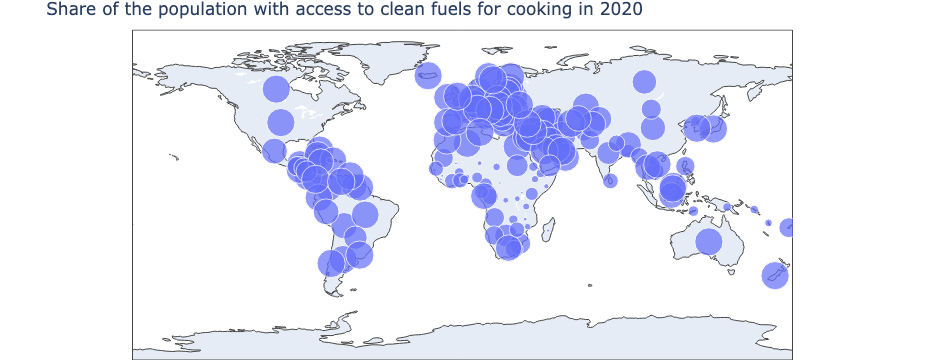

In [6]:
fig = px.scatter_geo(df_2020, 
                     locations="Code", # when you have standardized country CODES
                     size="Total", # size of markers
                     hover_name='Entity', # the text you see when you hover over the markers
                     title='Share of the population with access to clean fuels for cooking in 2020' # figure title
                    )

fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()


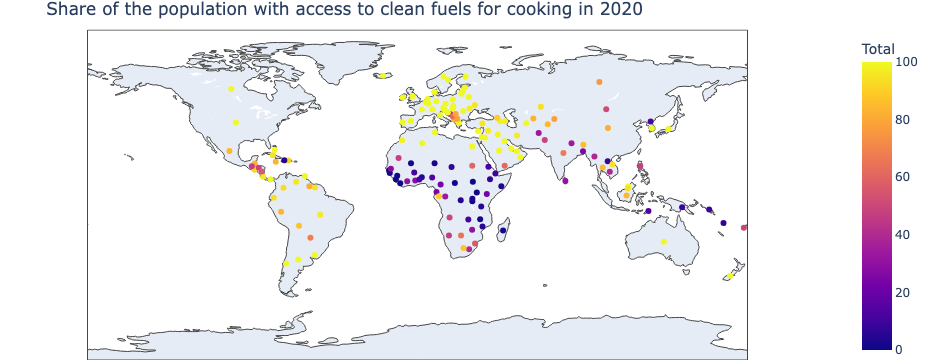

In [7]:
fig = px.scatter_geo(df_2020, 
                     locations="Code", # when you have standardized country CODES
                     color="Total", # size of markers
                     hover_name='Entity', # the text you see when you hover over the markers
                     title='Share of the population with access to clean fuels for cooking in 2020' # figure title
                    )

fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()


## Choropleth maps

https://plotly.com/python/choropleth-maps/

In [8]:
from urllib.request import urlopen
import json
with urlopen('https://cdn.jsdelivr.net/npm/world-atlas@2/countries-110m.json') as response:
    # this has boundaries of the countries
    countries = json.load(response)

# If you're looking for US information, use https://github.com/topojson/us-atlas

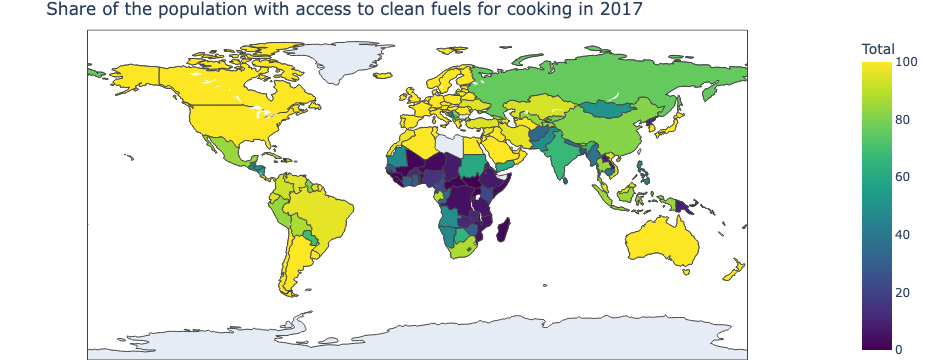

In [9]:
fig = px.choropleth(df_2020, 
                    geojson=countries, 
                    locations='Entity', 
                    locationmode='country names', # if you only have country NAMES
                    color='Total',
                    color_continuous_scale="Viridis",
                    hover_name='Entity', # the text you see when you hover over the markers
                    title='Share of the population with access to clean fuels for cooking in 2017' # figure title
                   )
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()